In [1]:
import pykat
import numpy as np

import pykat.ifo.aligo as aligo
import pykat.ifo.aligo.plot
import matplotlib.pyplot as plt

import scipy
from scipy import signal

pykat.init_pykat_plotting(fmts=['svg'])

C:\Users\tvo88\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


                                              ..-
    PyKat 1.1.277         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
# input parameters
f_i = 1
f_e = 10000

In [216]:
### Create the baseline file

### Get the DARM Cavity Pole from the shot noise
#%run LHO.py
#base0= make_LHO()

base0 = aligo.make_kat("design", keepComments=True, preserveConstants=True)

#Sometimes this setup crashes so I just keep trying
result = None
while result is None:
    try:
        base0 = aligo.setup(base0)
        print("Zero-ing locks")
        base0.IFO.zero_locks() #Find phases to lock the IFO
        result = 1
    except:
        pass
        print("Ran into a pykat error, trying again")
    
base_tunings = base0.IFO.get_tunings()

Zero-ing locks


In [217]:
print(base_tunings)

{'PRM': 0.003, 'ITMX': -0.001, 'ETMX': -0.004401441888054117, 'ITMY': 0.001, 'ETMY': 0.004401441888054117, 'BS': 0.0, 'SRM': -90.001, 'keys': {'phase': 2, 'maxtem': None}}


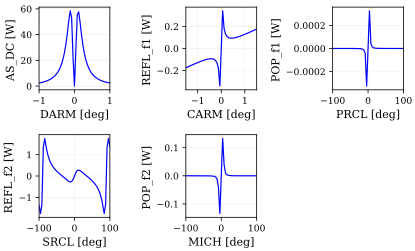

In [218]:
aligo.plot.error_signals(base0, xlimits=(-1, 1), steps=50)

In [219]:
### Add some detectors
base0.parse('''
pd0 POP_DC nPOP
pd1 POP_RF9  9099471.0  nPOP
pd1 POP_RF18 18198942.0  nPOP
pd1 REFL_9Q  9099471.0 90 nPRMs2

pd0 XARM_TRANS nETMX1
pd0 YARM_TRANS nETMY1

''')

In [223]:
kat0 = base0.deepcopy()

In [417]:
POP18_list = []
POP9_list = []
POPDC_list = []
REFL9_Q_list = []

dDiop = np.linspace(0, 30, 15)

for i in range(len(dDiop)):
    kat = base0.deepcopy()
    
    kat.ITMX_lens.f.value = 34500
    kat.ITMY_lens.f.value = ( 1/34500 + dDiop[i]*1e-6)**(-1.)
    
    kat.parse('''
    noxaxis
    ''')
    
    #print("Zero-ing Locks")
    kat.IFO.zero_locks()
    
    out=kat.run()
    
    POP9_list.append(out['POP_RF9'])
    POP18_list.append(out['POP_RF18'])
    POPDC_list.append(out['POP_DC'])
    REFL9_Q_list.append(out['REFL_9Q'])

In [418]:
POP18 = np.array(POP18_list)
POP9  = np.array(POP9_list)
POPDC = np.array(POPDC_list)
REFL9_Q = np.array(REFL9_Q_list)

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


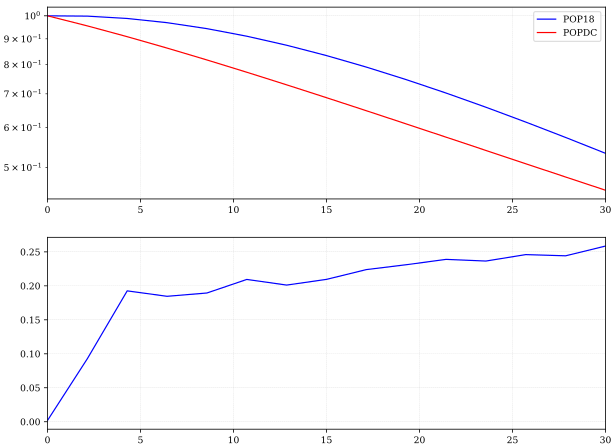

In [419]:
fig = plt.figure(figsize=(10,12))

ax = fig.add_subplot(311)
ax.semilogy(dDiop, POP18*(1/POP18[0]),label='POP18')
ax.semilogy(dDiop, POPDC*(1/POPDC[0]),label='POPDC')
ax.legend()

ax = fig.add_subplot(312)
ax.plot(dDiop, REFL9_Q )


plt.legend()
plt.show()

C:\Users\tvo88\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


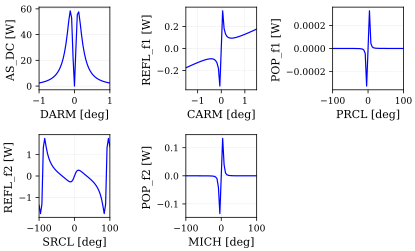

running


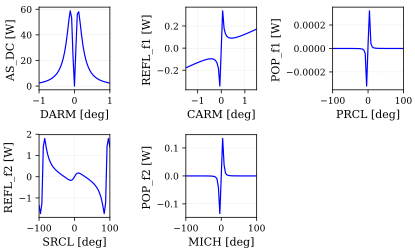

running


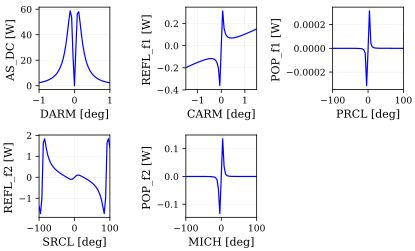

running


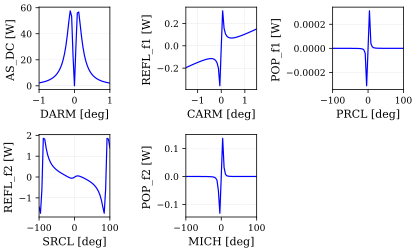

running


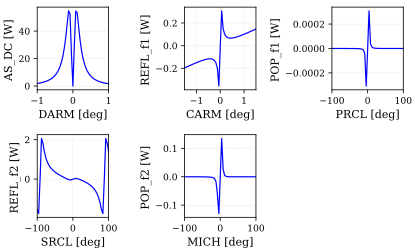

running


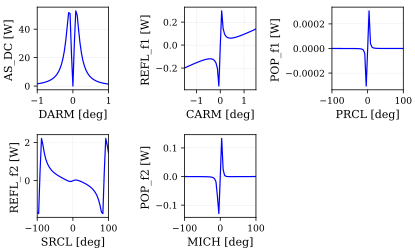

running


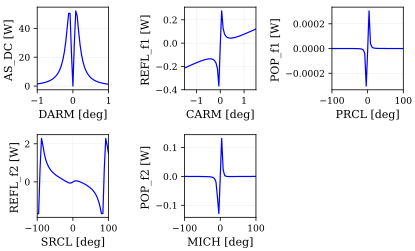

running


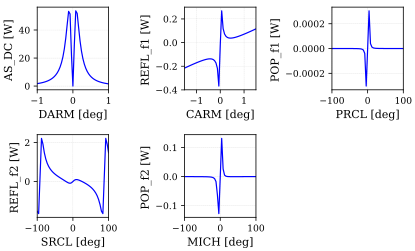

running


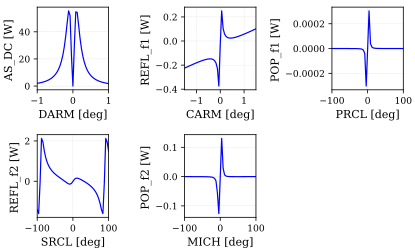

running


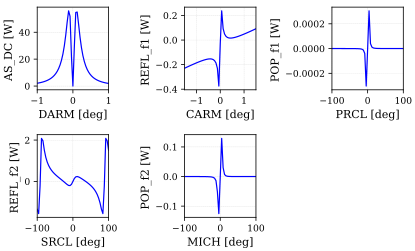

running


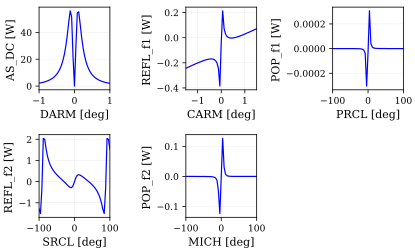

running


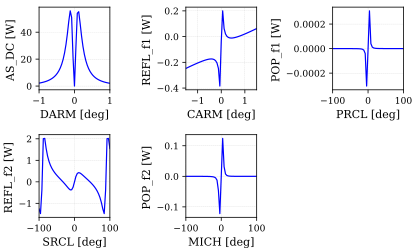

running


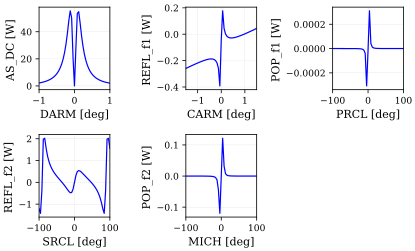

running


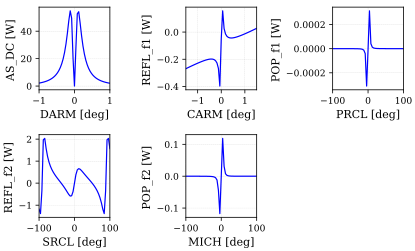

running


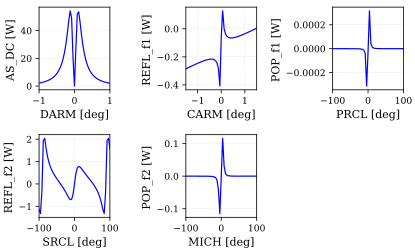

running


In [404]:
#Find PRCL Optical Gain
PRCL_list = []

for i in range(len(dDiop)):
    kat = base0.deepcopy()
    
    kat.ITMY_lens.f.value = (dDiop[i]*1e-6)**(-1.)
    
    kat.IFO.zero_locks()
    
    kat.PRM_lock.remove()
    kat.IFO.fix_mirrors()
    
    aligo.plot.error_signals(kat, xlimits=(-1, 1), steps=50)
    
    kat.parse('''
    noxaxis
    ''')
    
    
    out=kat.run()
    
    print("running")
    
    #PRCL_list.append(out['POP_I_sig'])

In [396]:
PRCL = np.array(PRCL_list)

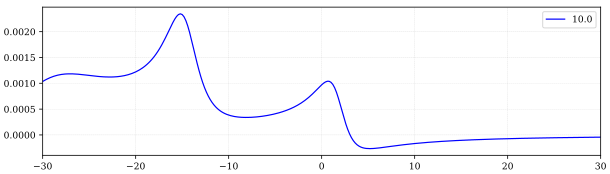

In [401]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(211)
ax.plot(out.x, PRCL[3], label=str(dDiop[i]))


plt.legend()
plt.show()

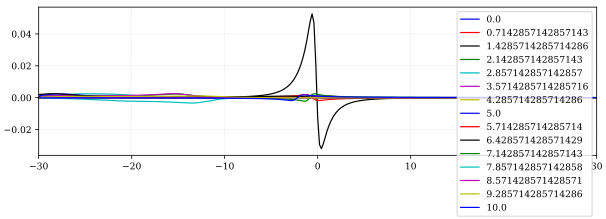

In [397]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(211)
for i in range(len(PRCL)):
    ax.plot(out.x, PRCL[i], label=str(dDiop[i]))


plt.legend()
plt.show()

In [391]:
PRCL

array([[-8.25298281e-05, -8.26868831e-05, -8.28475235e-05, ...,
         1.26878272e-04,  1.26295926e-04,  1.25722722e-04],
       [-3.62946524e-04, -2.57775549e-04, -1.53123804e-04, ...,
        -9.60175466e-06, -9.51061702e-06, -9.42063829e-06],
       [ 1.22986122e-04,  1.23406264e-04,  1.23835235e-04, ...,
        -1.24958933e-04, -1.24164340e-04, -1.23384649e-04],
       [ 3.52787514e-05,  3.55668393e-05,  3.59632315e-05, ...,
        -1.22310082e-05, -1.19998850e-05, -1.17746256e-05]])

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


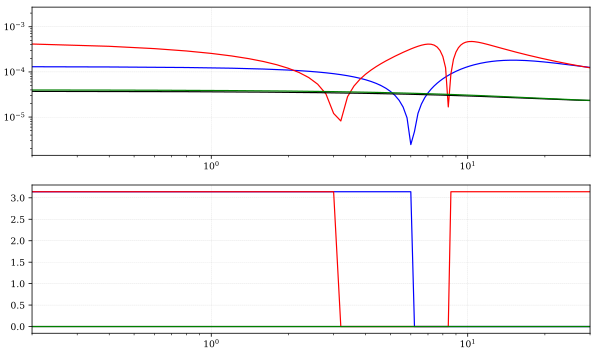

In [362]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(211)
for i in range(len(PRCL)):
    ax.loglog(out.x, np.absolute(PRCL[i]))
    
bx = fig.add_subplot(212)
for i in range(len(PRCL)):
    bx.semilogx(out.x, np.angle(PRCL[i]))

plt.legend()
plt.show()